Importação dos pacotes necessários e dos dados

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("dadosabertos_graduacao_quantitativo-de-alunos.xlsx")

Começando a análise exploratória

In [61]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CodCurso      2046 non-null   int64 
 1   NomeCurso     2046 non-null   object
 2   Ano           2046 non-null   int64 
 3   Periodo       2046 non-null   int64 
 4   Vinculados    2046 non-null   int64 
 5   Matriculados  2046 non-null   int64 
 6   Ingressantes  2046 non-null   int64 
 7   Diplomados    2046 non-null   int64 
 8   Evadidos      2046 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 144.0+ KB


,CodCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
count,2046.00000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000
mean,628.99609,2016.216031,1.500978,394.352395,347.320626,39.772239,20.630010,17.619746
std,445.17827,3.778366,0.500121,346.282810,309.282526,42.340810,25.490618,21.698446
min,298.00000,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,318.00000,2013.000000,1.000000,160.250000,139.000000,7.000000,2.000000,4.000000
50%,338.00000,2016.000000,2.000000,256.500000,227.000000,32.000000,13.000000,11.000000
75%,907.00000,2020.000000,2.000000,583.750000,498.000000,53.000000,31.000000,23.000000
max,1880.00000,2022.000000,2.000000,1996.000000,1901.000000,406.000000,308.000000,264.000000


Dados brutos

In [62]:
display(df)

,CodCurso,NomeCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,298,ADMINISTRAÇÃO,2010,1,1501,1349,169,91,24
1,583,ADMINISTRAÇÃO - EAD,2010,1,351,345,1,0,6
2,299,AGRONOMIA,2010,1,494,448,50,31,19
3,300,ARQUITETURA E URBANISMO,2010,1,625,578,53,41,12
4,301,ARQUIVOLOGIA,2010,1,157,134,30,4,6
...,...,...,...,...,...,...,...,...,...
2041,1490,RELAÇÕES PÚBLICAS,2022,2,292,247,26,19,18
2042,806,SAÚDE COLETIVA,2022,2,277,158,16,9,68
2043,907,SERVIÇO SOCIAL,2022,2,188,141,2,9,20
2044,302,TEATRO,2022,2,250,181,3,15,32


Limpeza dos dados

In [63]:
df_sem_2023 = df[df['Ano'] != 2023]
df = df_sem_2023
display(df)

,CodCurso,NomeCurso,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,298,ADMINISTRAÇÃO,2010,1,1501,1349,169,91,24
1,583,ADMINISTRAÇÃO - EAD,2010,1,351,345,1,0,6
2,299,AGRONOMIA,2010,1,494,448,50,31,19
3,300,ARQUITETURA E URBANISMO,2010,1,625,578,53,41,12
4,301,ARQUIVOLOGIA,2010,1,157,134,30,4,6
...,...,...,...,...,...,...,...,...,...
2041,1490,RELAÇÕES PÚBLICAS,2022,2,292,247,26,19,18
2042,806,SAÚDE COLETIVA,2022,2,277,158,16,9,68
2043,907,SERVIÇO SOCIAL,2022,2,188,141,2,9,20
2044,302,TEATRO,2022,2,250,181,3,15,32


Matriz de correlação do dataset completo

              CodCurso       Ano   Periodo  Vinculados  Matriculados  \
CodCurso      1.000000  0.176953  0.009879   -0.516926     -0.508974   
Ano           0.176953  1.000000  0.002217    0.014557      0.013499   
Periodo       0.009879  0.002217  1.000000   -0.004891     -0.005474   
Vinculados   -0.516926  0.014557 -0.004891    1.000000      0.990739   
Matriculados -0.508974  0.013499 -0.005474    0.990739      1.000000   
Ingressantes -0.347335 -0.048968 -0.237404    0.749880      0.749800   
Diplomados   -0.412402 -0.036030  0.160344    0.740269      0.751443   
Evadidos     -0.320411  0.011625  0.101737    0.583305      0.504152   

              Ingressantes  Diplomados  Evadidos  
CodCurso         -0.347335   -0.412402 -0.320411  
Ano              -0.048968   -0.036030  0.011625  
Periodo          -0.237404    0.160344  0.101737  
Vinculados        0.749880    0.740269  0.583305  
Matriculados      0.749800    0.751443  0.504152  
Ingressantes      1.000000    0.445781  0.388

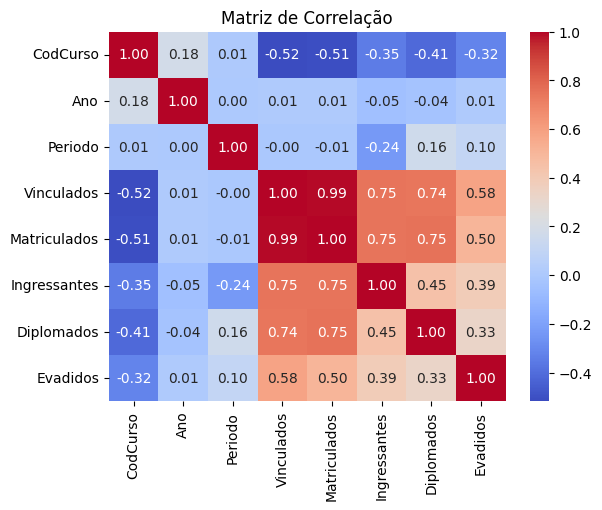

In [64]:
# Suponha que você tenha um DataFrame chamado df com seus dados
# Selecione apenas as colunas numéricas, se necessário
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Plotar mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [65]:
# Agrupar os dados por ano e período e calcular as métricas agregadas
dens_por_ano_periodo = df.groupby(['Ano', 'Periodo']).agg({
    'Vinculados': 'sum',  # Soma dos vinculados
    'Matriculados': 'sum',  # Soma dos matriculados
    'Ingressantes': 'sum',  # Soma dos ingressantes
    'Diplomados': 'sum',  # Soma dos diplomados
    'Evadidos': 'sum'  # Soma dos evadidos
}).reset_index()  # Resetar o índice do DataFrame resultante

# Exibir o DataFrame resultante
display(dens_por_ano_periodo)


,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,2010,1,27974,24531,3484,1119,1020
1,2010,2,27316,23936,1609,2430,1292
2,2011,1,27421,24249,3690,1304,1224
3,2011,2,26991,23828,2058,1901,1328
4,2012,1,27813,24779,3915,1203,1138
5,2012,2,27740,24259,2248,1919,1330
6,2013,1,28586,25273,4029,1091,1102
7,2013,2,28830,25253,2447,1920,1170
8,2014,1,30262,26640,4469,1028,1192
9,2014,2,30668,26626,2616,1874,1446


Análise a parte dos dados separados por periodo e ano

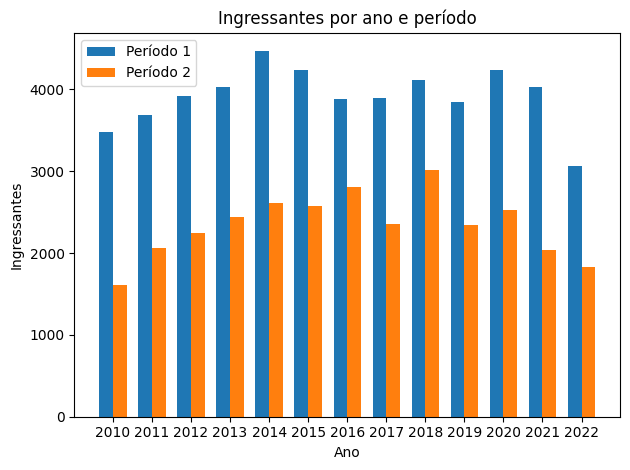

In [66]:
import numpy as np

# Supondo que 'df' seja o seu DataFrame com os dados

# Filtrar os dados para cada período
periodo1 = df[df['Periodo'] == 1]
periodo2 = df[df['Periodo'] == 2]

# Anos disponíveis no DataFrame
anos = df['Ano'].unique()

# Número de anos
num_anos = len(anos)

# Definir a largura das barras
largura_barra = 0.35

# Definir a posição das barras para cada período
posicao_barra_periodo1 = np.arange(num_anos)
posicao_barra_periodo2 = [x + largura_barra for x in posicao_barra_periodo1]

# Altura das barras para cada período
ingressantes_periodo1 = [periodo1[periodo1['Ano'] == ano]['Ingressantes'].sum() for ano in anos]
ingressantes_periodo2 = [periodo2[periodo2['Ano'] == ano]['Ingressantes'].sum() for ano in anos]

# Criar o gráfico de barras
plt.bar(posicao_barra_periodo1, ingressantes_periodo1, largura_barra, label='Período 1')
plt.bar(posicao_barra_periodo2, ingressantes_periodo2, largura_barra, label='Período 2')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Ingressantes')
plt.title('Ingressantes por ano e período')
plt.xticks([x + largura_barra / 2 for x in posicao_barra_periodo1], anos)
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


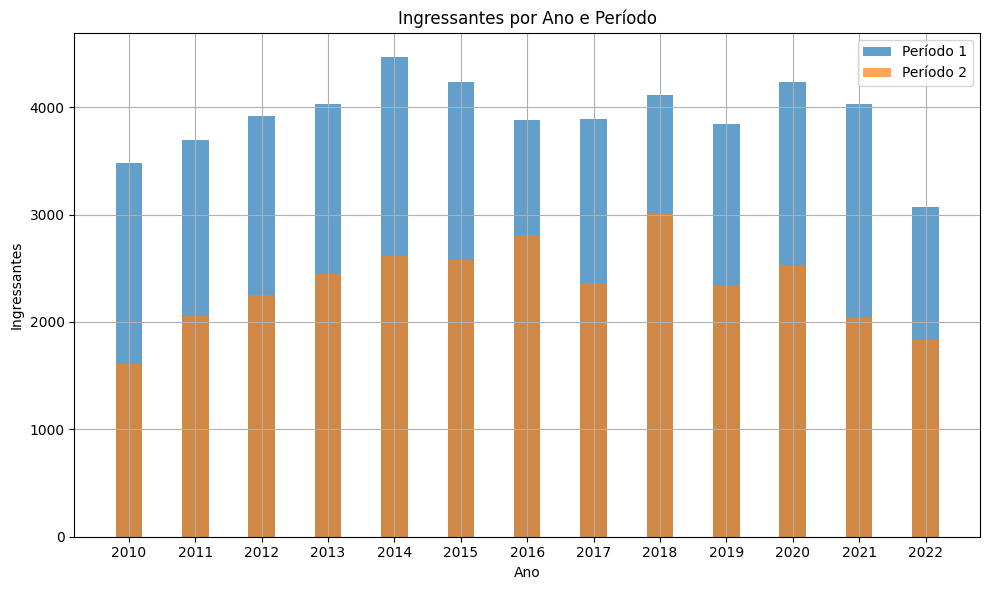

In [67]:
# Agrupar os dados por Ano e Periodo e somar os ingressantes
df_grouped = dens_por_ano_periodo.groupby(['Ano', 'Periodo']).sum().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
for i, periodo in enumerate(df_grouped['Periodo'].unique(), start=1):
    plt.bar(df_grouped[df_grouped['Periodo'] == periodo]['Ano'], 
            df_grouped[df_grouped['Periodo'] == periodo]['Ingressantes'], 
            label=f'Período {periodo}', alpha=0.7, width=0.4, align='center')

plt.xlabel('Ano')
plt.ylabel('Ingressantes')
plt.title('Ingressantes por Ano e Período')
plt.xticks(df_grouped['Ano'].unique())
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Separando apenas ingressantes, evadidos, diplomados e matriculados por ano, os dados quantitativos de forma geral

In [68]:
dens_por_ano = df[["Ano","Vinculados", "Matriculados", "Ingressantes", "Diplomados", "Evadidos"]].groupby("Ano").sum().reset_index()
display(dens_por_ano)


,Ano,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,2010,55290,48467,5093,3549,2312
1,2011,54412,48077,5748,3205,2552
2,2012,55553,49038,6163,3122,2468
3,2013,57416,50526,6476,3011,2272
4,2014,60930,53266,7085,2902,2638
5,2015,63424,54735,6809,2973,2646
6,2016,65174,56879,6690,3075,3450
7,2017,64869,56951,6255,3549,3640
8,2018,64565,57493,7128,3644,2991
9,2019,63972,56433,6183,3781,3523


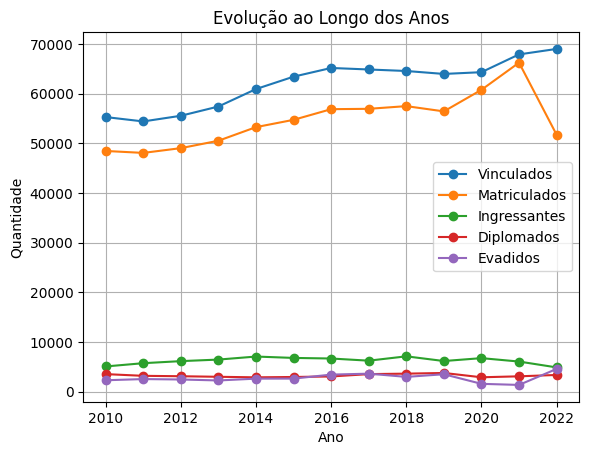

In [69]:
# Definir os dados para cada coluna
anos = dens_por_ano['Ano']
vinculados = dens_por_ano['Vinculados']
matriculados = dens_por_ano['Matriculados']
ingressantes = dens_por_ano['Ingressantes']
diplomados = dens_por_ano['Diplomados']
evadidos = dens_por_ano['Evadidos']

# Criar o gráfico de linhas
plt.plot(anos, vinculados, label='Vinculados', marker='o')
plt.plot(anos, matriculados, label='Matriculados', marker='o')
plt.plot(anos, ingressantes, label='Ingressantes', marker='o')
plt.plot(anos, diplomados, label='Diplomados', marker='o')
plt.plot(anos, evadidos, label='Evadidos', marker='o')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Evolução ao Longo dos Anos')
plt.legend()

# Mostrar o gráfico
# plt.tight_layout()
plt.grid(True)
plt.show()


In [70]:
dens_por_ano.head()
dens_por_ano.info()
dens_por_ano.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Ano           13 non-null     int64
 1   Vinculados    13 non-null     int64
 2   Matriculados  13 non-null     int64
 3   Ingressantes  13 non-null     int64
 4   Diplomados    13 non-null     int64
 5   Evadidos      13 non-null     int64
dtypes: int64(6)
memory usage: 756.0 bytes


,Ano,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2016.00000,62065.000000,54662.923077,6259.538462,3246.846154,2773.076923
std,3.89444,4885.975525,5273.911127,691.702563,298.926927,871.517303
min,2010.00000,54412.000000,48077.000000,4901.000000,2902.000000,1374.000000
25%,2013.00000,57416.000000,50526.000000,6078.000000,3011.000000,2312.000000
50%,2016.00000,63972.000000,54735.000000,6255.000000,3122.000000,2638.000000
75%,2019.00000,64869.000000,56951.000000,6765.000000,3549.000000,3450.000000
max,2022.00000,69008.000000,66241.000000,7128.000000,3781.000000,4591.000000


Matriz de correlação dos dados agrupados por ano

                   Ano  Vinculados  Matriculados  Ingressantes  Diplomados  \
Ano           1.000000    0.933937      0.753751      0.048228    0.144740   
Vinculados    0.933937    1.000000      0.759347      0.129481    0.106818   
Matriculados  0.753751    0.759347      1.000000      0.396633   -0.061263   
Ingressantes  0.048228    0.129481      0.396633      1.000000   -0.363636   
Diplomados    0.144740    0.106818     -0.061263     -0.363636    1.000000   
Evadidos      0.239069    0.340606     -0.272453     -0.276789    0.504696   

              Evadidos  
Ano           0.239069  
Vinculados    0.340606  
Matriculados -0.272453  
Ingressantes -0.276789  
Diplomados    0.504696  
Evadidos      1.000000  


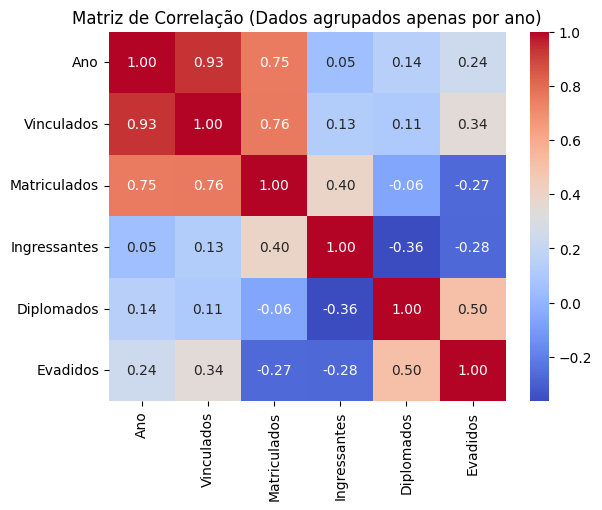

In [71]:
# Suponha que você tenha um DataFrame chamado df com seus dados
# Selecione apenas as colunas numéricas, se necessário
df_numeric = dens_por_ano.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Plotar mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Dados agrupados apenas por ano)')
plt.show()

Selecionando apenas os ingressantes por ano

In [72]:
ing_por_ano = dens_por_ano[['Ano', 'Ingressantes']].copy()
display(ing_por_ano)

,Ano,Ingressantes
0,2010,5093
1,2011,5748
2,2012,6163
3,2013,6476
4,2014,7085
5,2015,6809
6,2016,6690
7,2017,6255
8,2018,7128
9,2019,6183


Selecionando apenas os evadidos por ano

In [73]:
ev_por_ano = dens_por_ano[['Ano', 'Evadidos']].copy()
display(ev_por_ano)

,Ano,Evadidos
0,2010,2312
1,2011,2552
2,2012,2468
3,2013,2272
4,2014,2638
5,2015,2646
6,2016,3450
7,2017,3640
8,2018,2991
9,2019,3523


Selecionando apenas os diplomados por ano

In [74]:
dip_por_ano = dens_por_ano[['Ano', 'Diplomados']].copy()
display(dip_por_ano)

,Ano,Diplomados
0,2010,3549
1,2011,3205
2,2012,3122
3,2013,3011
4,2014,2902
5,2015,2973
6,2016,3075
7,2017,3549
8,2018,3644
9,2019,3781


Selecionando apenas os matriculados

In [75]:
mat_por_ano = dens_por_ano[['Ano', 'Matriculados']].copy()
display(mat_por_ano)

,Ano,Matriculados
0,2010,48467
1,2011,48077
2,2012,49038
3,2013,50526
4,2014,53266
5,2015,54735
6,2016,56879
7,2017,56951
8,2018,57493
9,2019,56433


Correlação entre ingressantes e evadidos

Correlação entre Ingressantes e Evadidos: -0.2767892051543224


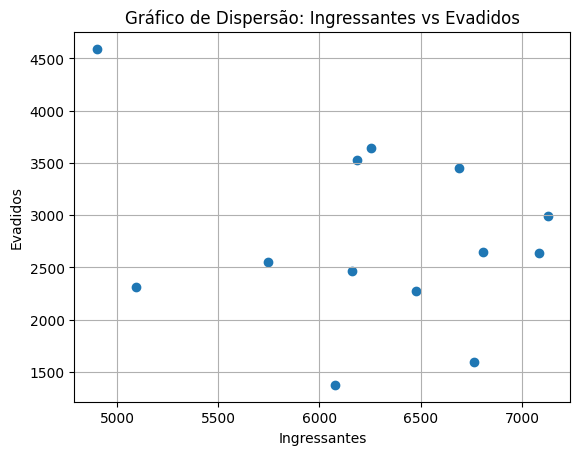

In [76]:
# Calcular a correlação entre as colunas 'Ingressantes' e 'Evadidos'
correlacao = dens_por_ano['Ingressantes'].corr(dens_por_ano['Evadidos'])

print("Correlação entre Ingressantes e Evadidos:", correlacao)

# Extrair as colunas de interesse para o gráfico de dispersão
x = dens_por_ano['Ingressantes']
y = dens_por_ano['Evadidos']

# Plotar o gráfico de dispersão
plt.scatter(x, y)
plt.xlabel('Ingressantes')
plt.ylabel('Evadidos')
plt.title('Gráfico de Dispersão: Ingressantes vs Evadidos')
plt.grid(True)
plt.show()

Gráfico geral entre ingressantes x evadidos ao longo dos anos na UFRGS

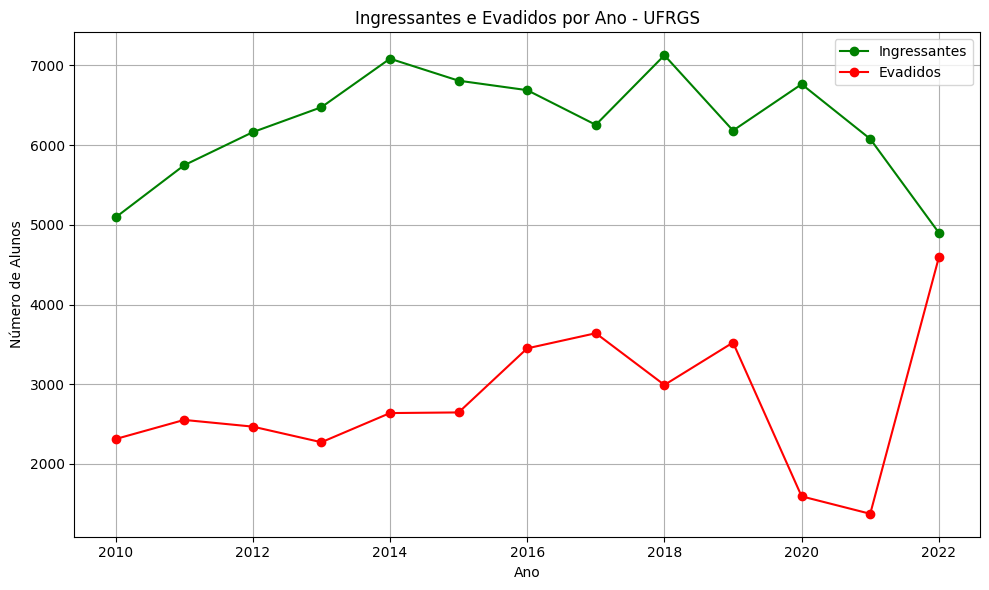

In [77]:
# Plotar os dados
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
plt.plot(dens_por_ano["Ano"], dens_por_ano["Ingressantes"], label='Ingressantes',color='green', marker='o')  # Plotar ingressantes
plt.plot(dens_por_ano["Ano"], dens_por_ano["Evadidos"], label='Evadidos',color='red', marker='o')  # Plotar evadidos

# Adicionar rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Ingressantes e Evadidos por Ano - UFRGS')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar o layout para evitar que as legendas se sobreponham
plt.show()

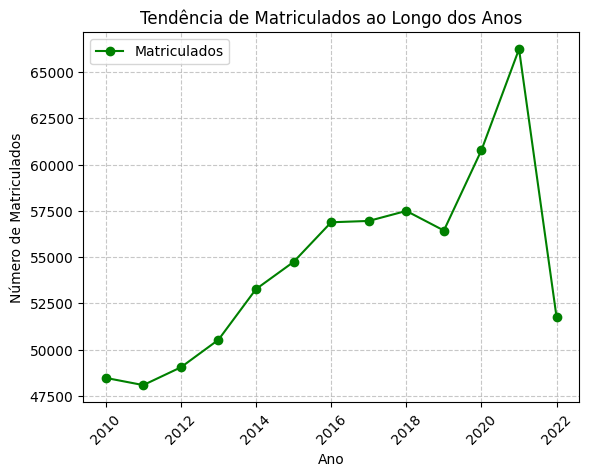

In [78]:
# Plotar o gráfico de linhas
mat_por_ano.plot(x='Ano', y='Matriculados', kind='line', marker='o', color='green')
plt.title('Tendência de Matriculados ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Matriculados')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

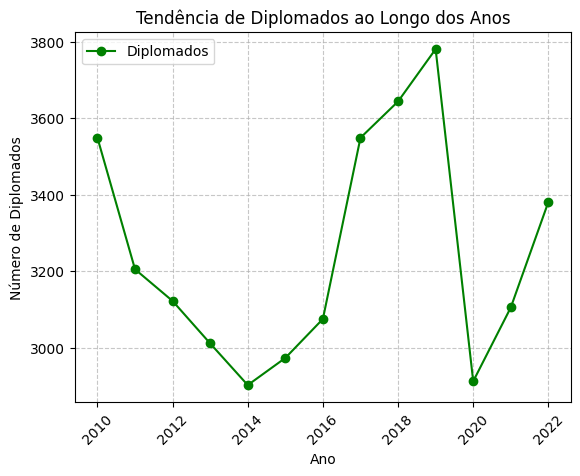

In [79]:
# Plotar o gráfico de linhas
dip_por_ano.plot(x='Ano', y='Diplomados', kind='line', marker='o', color='green')
plt.title('Tendência de Diplomados ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Diplomados')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Calculando agora os evadidos e ingressantes exclusivamente nos cursos de CIC e ECP. Primeiro os evadidos

In [80]:
# Filtrar os dados para os cursos 'CIÊNCIA DA COMPUTAÇÃO' e 'ENGENHARIA DE COMPUTAÇÃO'
df_filtrado = df[df['NomeCurso'].isin(['CIÊNCIA DA COMPUTAÇÃO', 'ENGENHARIA DE COMPUTAÇÃO'])]

# Agrupar por ano e calcular a soma de ingressantes por ano
ev_por_ano_f = df_filtrado.groupby('Ano')['Evadidos'].sum()

# Transformar a série em um DataFrame
df_evadidos = pd.DataFrame({'Ano': ev_por_ano_f.index, 'Evadidos': ev_por_ano_f.values})

ev_por_ano_f = df_evadidos

# Exibir o DataFrame resultante
display(ev_por_ano_f)



,Ano,Evadidos
0,2010,75
1,2011,75
2,2012,77
3,2013,64
4,2014,70
5,2015,62
6,2016,139
7,2017,107
8,2018,87
9,2019,118


Agora os ingressantes

In [81]:
# Agrupar por ano e calcular a soma de ingressantes por ano
ing_por_ano_f = df_filtrado.groupby('Ano')['Ingressantes'].sum()

# Transformar a série em um DataFrame
df_ingressantes = pd.DataFrame({'Ano': ing_por_ano_f.index, 'Ingressantes': ing_por_ano_f.values})

ing_por_ano_f = df_ingressantes
# Exibir o DataFrame resultante
display(ing_por_ano_f)

,Ano,Ingressantes
0,2010,168
1,2011,200
2,2012,180
3,2013,178
4,2014,227
5,2015,210
6,2016,230
7,2017,214
8,2018,162
9,2019,198


Agora, os matriculados

In [82]:
# Agrupar por ano e calcular a soma de diplomados por ano
df_matriculados = df_filtrado.groupby('Ano')['Matriculados'].sum()

# Transformar a série em um DataFrame
df_matriculados = pd.DataFrame({'Ano': df_matriculados.index, 'Matriculados': df_matriculados.values})

mat_por_ano_f = df_matriculados

# Exibir o DataFrame resultante
display(mat_por_ano_f)


,Ano,Matriculados
0,2010,1516
1,2011,1583
2,2012,1647
3,2013,1714
4,2014,1823
5,2015,1873
6,2016,1957
7,2017,1984
8,2018,1986
9,2019,1939


Agora os vinculados

In [83]:
# Agrupar por ano e calcular a soma de diplomados por ano

df_vinculados = df_filtrado.groupby('Ano')['Vinculados'].sum()

# Transformar a série em um DataFrame
df_vinculados = pd.DataFrame({'Ano': df_vinculados.index, 'Vinculados': df_vinculados.values})

vin_por_ano_f = df_vinculados

# Exibir o DataFrame resultante
display(vin_por_ano_f)

,Ano,Vinculados
0,2010,1690
1,2011,1736
2,2012,1797
3,2013,1838
4,2014,1995
5,2015,2106
6,2016,2237
7,2017,2226
8,2018,2204
9,2019,2207


Por fim, os diplomados

In [84]:
# Agrupar por ano e calcular a soma de diplomados por ano
df_diplomados = df_filtrado.groupby('Ano')['Diplomados'].sum()

# Transformar a série em um DataFrame
df_diplomados = pd.DataFrame({'Ano': df_diplomados.index, 'Diplomados': df_diplomados.values})

dip_por_ano_f = df_diplomados

# Exibir o DataFrame resultante
display(dip_por_ano_f)


,Ano,Diplomados
0,2010,90
1,2011,73
2,2012,86
3,2013,77
4,2014,87
5,2015,85
6,2016,90
7,2017,78
8,2018,86
9,2019,87


Tendencia de diplomados ao longo dos anos

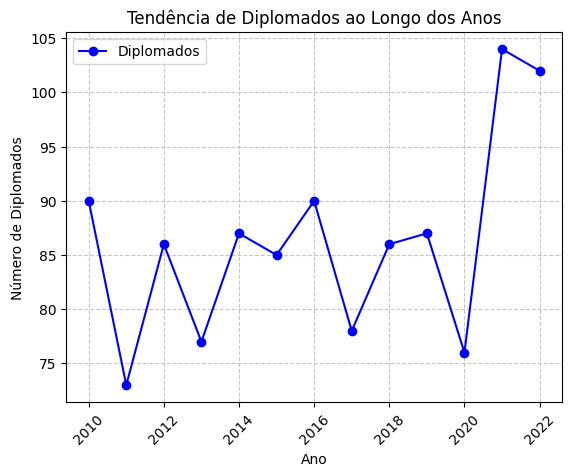

In [85]:
# Plotar o gráfico de linhas
dip_por_ano_f.plot(x='Ano', y='Diplomados', kind='line', marker='o', color='blue')
plt.title('Tendência de Diplomados ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Diplomados')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Tendência de ingressantes ao longo dos anos

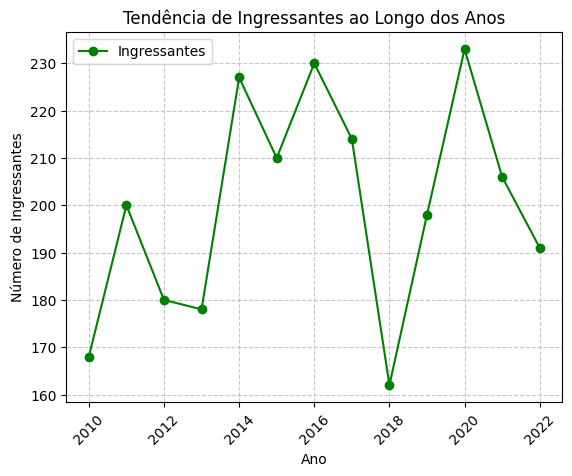

In [86]:
# Plotar o gráfico de linhas
ing_por_ano_f.plot(x='Ano', y='Ingressantes', kind='line', marker='o', color='green')
plt.title('Tendência de Ingressantes ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Ingressantes')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Tendência de evadidos ao longo dos anos

,Ano,Evadidos
0,2010,75
1,2011,75
2,2012,77
3,2013,64
4,2014,70
5,2015,62
6,2016,139
7,2017,107
8,2018,87
9,2019,118


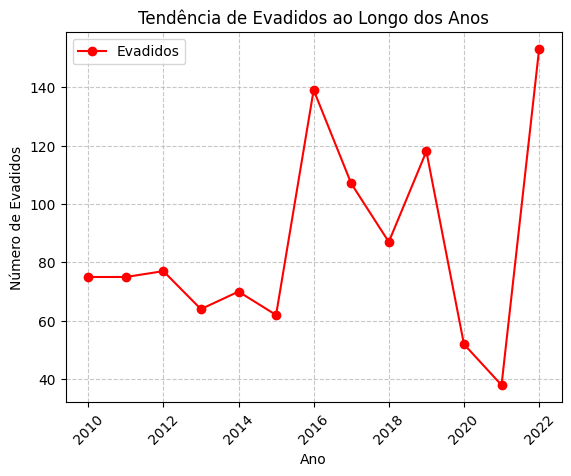

<class 'pandas.core.frame.DataFrame'>


In [87]:
display(ev_por_ano_f)
# Plotar o gráfico de linhas
ev_por_ano_f.plot(x='Ano', y='Evadidos', kind='line', marker='o', color='red')
plt.title('Tendência de Evadidos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Evadidos')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(type(ev_por_ano_f))

Tendência de diplomados ao longo dos anos

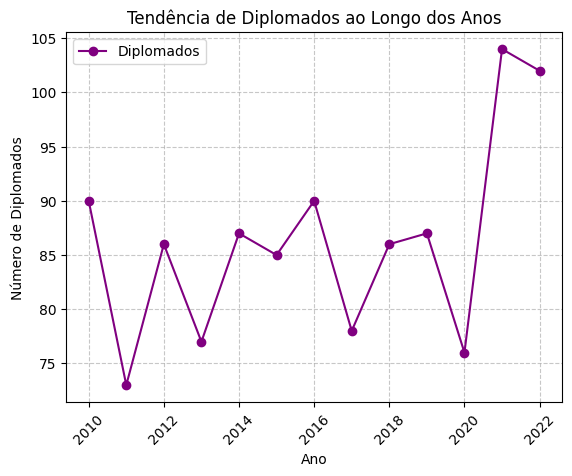

In [88]:
dip_por_ano_f.plot(x='Ano', y='Diplomados', kind='line', marker='o', color='purple')
plt.title('Tendência de Diplomados ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Diplomados')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

GRÁFICO INGRESSANTES E EVADIDOS - CIC E ECP UFRGS

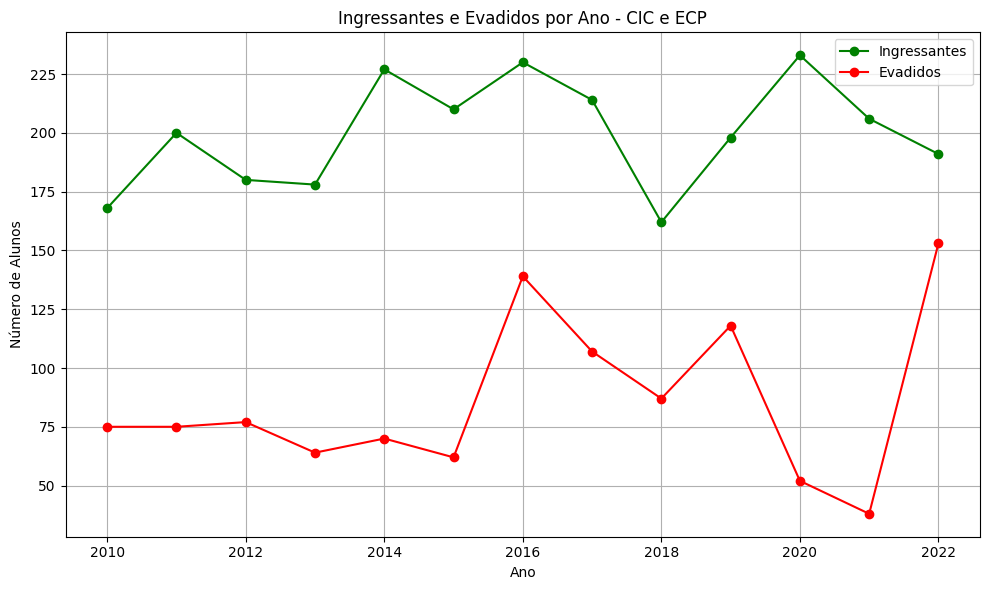

In [89]:
# Suponha que você já tenha os DataFrames dens_por_ano e ev_por_ano

# Extrair os dados para plotagem
anos_densidade = ing_por_ano_f['Ano'] # Anos para o DataFrame dens_por_ano
ingressantes = ing_por_ano_f['Ingressantes']  # Dados de ingressantes
anos_evadidos = ev_por_ano_f['Ano']  # Anos para o DataFrame ev_por_ano
evadidos = ev_por_ano_f['Evadidos']  # Dados de evadidos

# Plotar os dados
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
plt.plot(anos_densidade, ingressantes, label='Ingressantes',color='green', marker='o')  # Plotar ingressantes
plt.plot(anos_evadidos, evadidos, label='Evadidos',color='red', marker='o')  # Plotar evadidos

# Adicionar rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Ingressantes e Evadidos por Ano - CIC e ECP')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar o layout para evitar que as legendas se sobreponham
plt.show()

Concatenando as colunas criadas anteriormente por ano em CIC e ECP

In [90]:
dens_por_ano_f = df_filtrado[["Ano","Vinculados", "Matriculados", "Ingressantes", "Diplomados", "Evadidos"]].groupby("Ano").sum().reset_index()
display(dens_por_ano_f)

,Ano,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,2010,1690,1516,168,90,75
1,2011,1736,1583,200,73,75
2,2012,1797,1647,180,86,77
3,2013,1838,1714,178,77,64
4,2014,1995,1823,227,87,70
5,2015,2106,1873,210,85,62
6,2016,2237,1957,230,90,139
7,2017,2226,1984,214,78,107
8,2018,2204,1986,162,86,87
9,2019,2207,1939,198,87,118


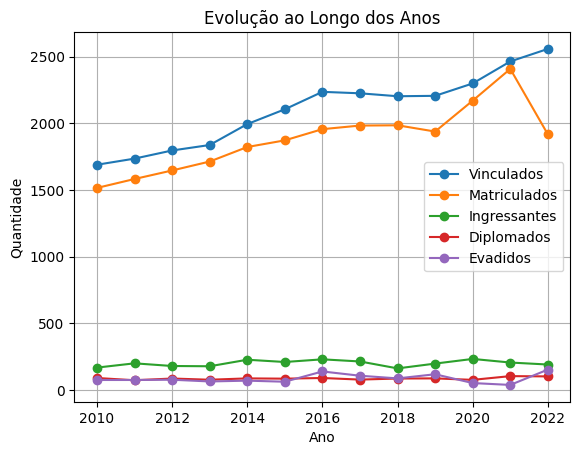

In [91]:
# Definir os dados para cada coluna
anos = dens_por_ano_f['Ano']
vinculados = dens_por_ano_f['Vinculados']
matriculados = dens_por_ano_f['Matriculados']
ingressantes = dens_por_ano_f['Ingressantes']
diplomados = dens_por_ano_f['Diplomados']
evadidos = dens_por_ano_f['Evadidos']

# Criar o gráfico de linhas
plt.plot(anos, vinculados, label='Vinculados', marker='o')
plt.plot(anos, matriculados, label='Matriculados', marker='o')
plt.plot(anos, ingressantes, label='Ingressantes', marker='o')
plt.plot(anos, diplomados, label='Diplomados', marker='o')
plt.plot(anos, evadidos, label='Evadidos', marker='o')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Evolução ao Longo dos Anos')
plt.legend()

# Mostrar o gráfico
# plt.tight_layout()
plt.grid(True)
plt.show()


Gráfico Vinculados vs Matriculados - CIC e ECP

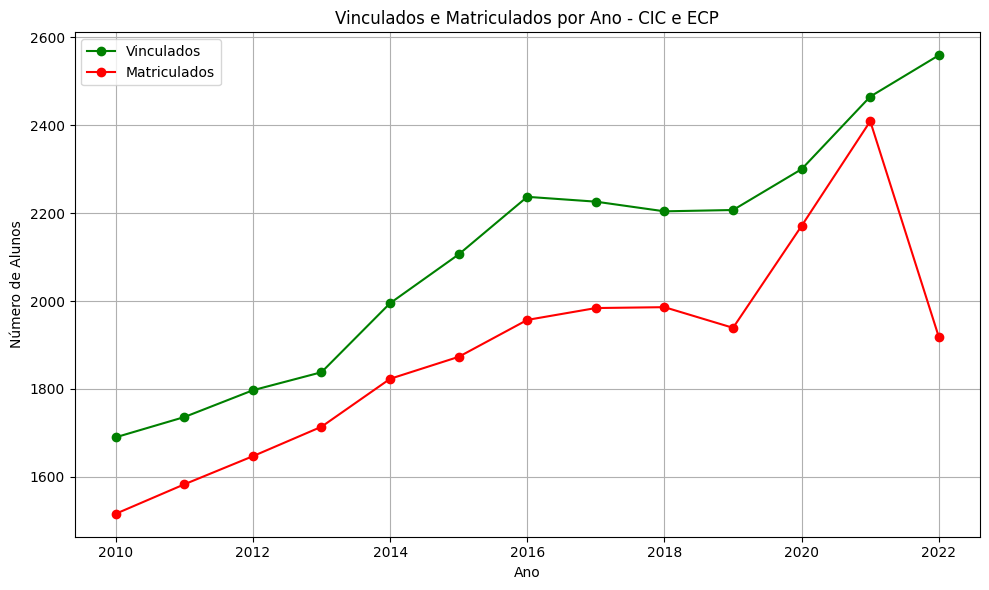

In [92]:
# Plotar os dados
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
plt.plot(dens_por_ano_f["Ano"], dens_por_ano_f["Vinculados"], label='Vinculados',color='green', marker='o')  # Plotar ingressantes
plt.plot(dens_por_ano_f["Ano"], dens_por_ano_f["Matriculados"], label='Matriculados',color='red', marker='o')  # Plotar evadidos

# Adicionar rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Vinculados e Matriculados por Ano - CIC e ECP')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)  # Adicionar grade ao gráfico
plt.tight_layout()  # Ajustar o layout para evitar que as legendas se sobreponham
plt.show()

Separando por ano e periodo a parte

In [93]:
# Agrupar os dados por ano e período e calcular as métricas agregadas
dens_por_ano_periodo_f = df_filtrado.groupby(['Ano', 'Periodo']).agg({
    'Vinculados': 'sum',  # Soma dos vinculados
    'Matriculados': 'sum',  # Soma dos matriculados
    'Ingressantes': 'sum',  # Soma dos ingressantes
    'Diplomados': 'sum',  # Soma dos diplomados
    'Evadidos': 'sum'  # Soma dos evadidos
}).reset_index()  # Resetar o índice do DataFrame resultante

# Exibir o DataFrame resultante
display(dens_por_ano_periodo_f)

,Ano,Periodo,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,2010,1,848,765,106,44,24
1,2010,2,842,751,62,46,51
2,2011,1,859,785,116,30,34
3,2011,2,877,798,84,43,41
4,2012,1,908,833,115,45,38
5,2012,2,889,814,65,41,39
6,2013,1,919,857,110,33,34
7,2013,2,919,857,68,44,30
8,2014,1,998,922,153,40,35
9,2014,2,997,901,74,47,35


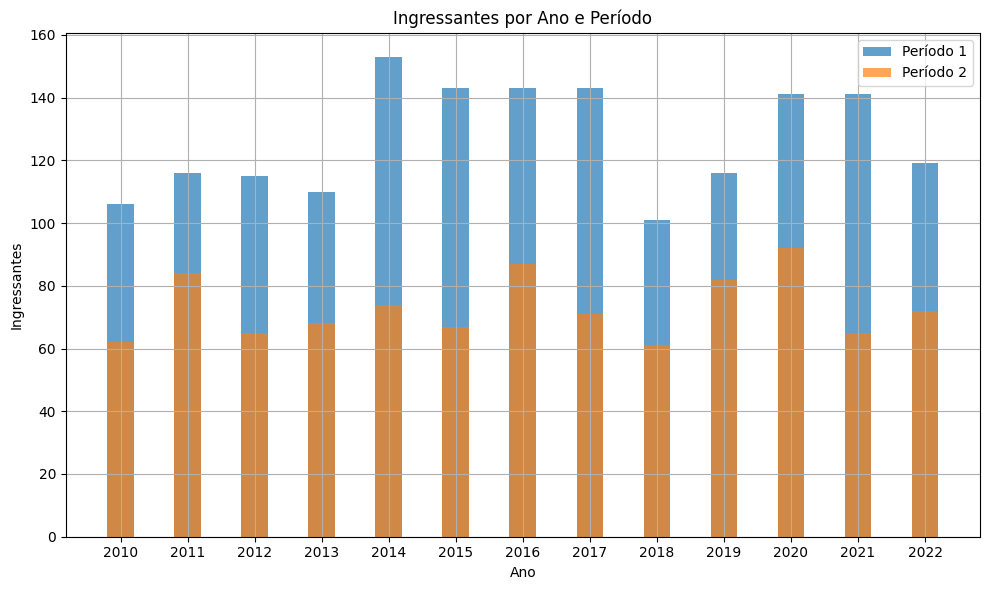

In [94]:
# Agrupar os dados por Ano e Periodo e somar os ingressantes
df_grouped = dens_por_ano_periodo_f.groupby(['Ano', 'Periodo']).sum().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
for i, periodo in enumerate(df_grouped['Periodo'].unique(), start=1):
    plt.bar(df_grouped[df_grouped['Periodo'] == periodo]['Ano'], 
            df_grouped[df_grouped['Periodo'] == periodo]['Ingressantes'], 
            label=f'Período {periodo}', alpha=0.7, width=0.4, align='center')

plt.xlabel('Ano')
plt.ylabel('Ingressantes')
plt.title('Ingressantes por Ano e Período')
plt.xticks(df_grouped['Ano'].unique())
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [95]:
dens_por_ano_f.head()
dens_por_ano_f.info()
dens_por_ano_f.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Ano           13 non-null     int64
 1   Vinculados    13 non-null     int64
 2   Matriculados  13 non-null     int64
 3   Ingressantes  13 non-null     int64
 4   Diplomados    13 non-null     int64
 5   Evadidos      13 non-null     int64
dtypes: int64(6)
memory usage: 756.0 bytes


,Ano,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2016.00000,2104.615385,1886.153846,199.769231,86.230769,85.923077
std,3.89444,275.779060,242.002702,23.249207,9.257014,33.988874
min,2010.00000,1690.000000,1516.000000,162.000000,73.000000,38.000000
25%,2013.00000,1838.000000,1714.000000,180.000000,78.000000,64.000000
50%,2016.00000,2204.000000,1918.000000,200.000000,86.000000,75.000000
75%,2019.00000,2237.000000,1984.000000,214.000000,90.000000,107.000000
max,2022.00000,2559.000000,2409.000000,233.000000,104.000000,153.000000


In [96]:
# Suponha que dens_por_ano_f já esteja definido anteriormente
display(dens_por_ano_f)

,Ano,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos
0,2010,1690,1516,168,90,75
1,2011,1736,1583,200,73,75
2,2012,1797,1647,180,86,77
3,2013,1838,1714,178,77,64
4,2014,1995,1823,227,87,70
5,2015,2106,1873,210,85,62
6,2016,2237,1957,230,90,139
7,2017,2226,1984,214,78,107
8,2018,2204,1986,162,86,87
9,2019,2207,1939,198,87,118


Calculando as médias de cada coluna

In [97]:
def adicionar_media_indicadores(df):
    # Calcula a média de cada coluna (exceto 'Ano')
    medias = df.mean()

    # Adiciona colunas indicando se os valores estão acima da média (S/N)
    for col in df.columns:
        if col != 'Ano':
            df[f'{col}_AcimaMedia'] = df[col].apply(lambda x: 'S' if x > medias[col] else 'N')
    
    return df

dens_por_ano_f = adicionar_media_indicadores(dens_por_ano_f)

display(dens_por_ano_f)

,Ano,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos,Vinculados_AcimaMedia,Matriculados_AcimaMedia,Ingressantes_AcimaMedia,Diplomados_AcimaMedia,Evadidos_AcimaMedia
0,2010,1690,1516,168,90,75,N,N,N,S,N
1,2011,1736,1583,200,73,75,N,N,S,N,N
2,2012,1797,1647,180,86,77,N,N,N,N,N
3,2013,1838,1714,178,77,64,N,N,N,N,N
4,2014,1995,1823,227,87,70,N,N,S,S,N
5,2015,2106,1873,210,85,62,S,N,S,N,N
6,2016,2237,1957,230,90,139,S,S,S,S,S
7,2017,2226,1984,214,78,107,S,S,S,N,S
8,2018,2204,1986,162,86,87,S,S,N,N,S
9,2019,2207,1939,198,87,118,S,S,N,S,S


Comparar nossos dados com médias

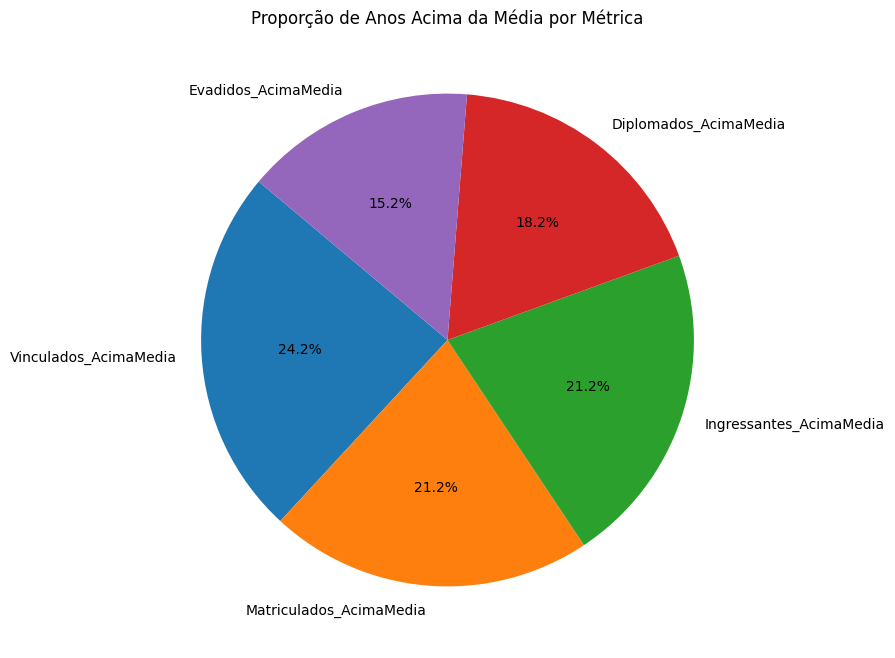

In [98]:
# Calcular a soma de AcimaMedia para cada métrica

acima_media_counts = dens_por_ano_f[['Vinculados_AcimaMedia', 'Matriculados_AcimaMedia', 'Ingressantes_AcimaMedia', 'Diplomados_AcimaMedia', 'Evadidos_AcimaMedia']].apply(pd.value_counts).loc['S']

# Plotar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(acima_media_counts, labels=acima_media_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Anos Acima da Média por Métrica')
plt.show()


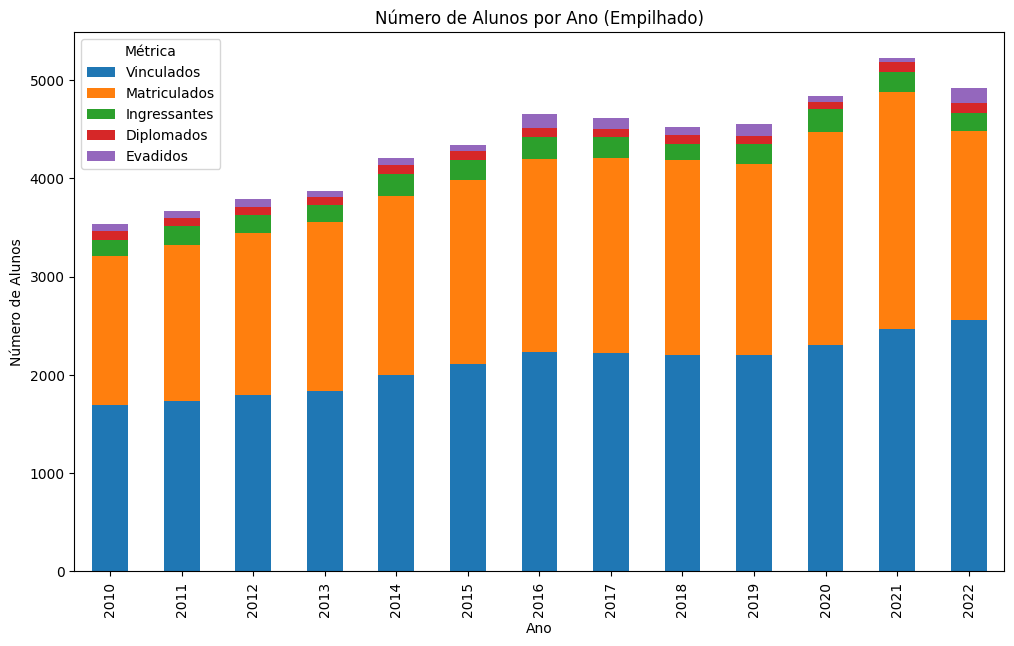

In [99]:
# Preparar dados para gráfico de barras empilhadas
df_stack = dens_por_ano_f.set_index('Ano')[['Vinculados', 'Matriculados', 'Ingressantes', 'Diplomados', 'Evadidos']]

# Plotar gráfico de barras empilhadas
df_stack.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Número de Alunos por Ano (Empilhado)')
plt.legend(title='Métrica')
plt.show()

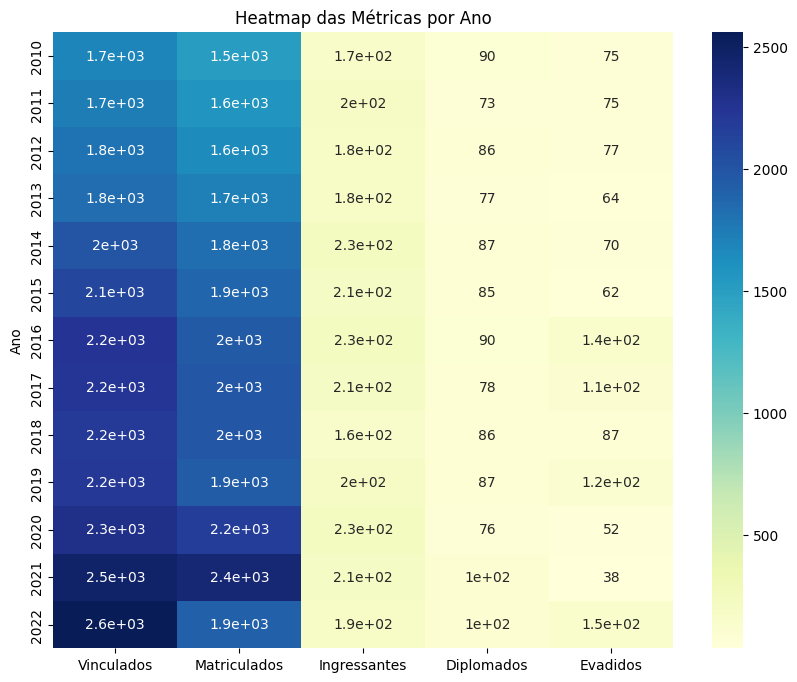

In [100]:
# Plotar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dens_por_ano_f.set_index('Ano')[['Vinculados', 'Matriculados', 'Ingressantes', 'Diplomados', 'Evadidos']], annot=True, cmap='YlGnBu')
plt.title('Heatmap das Métricas por Ano')
plt.show()

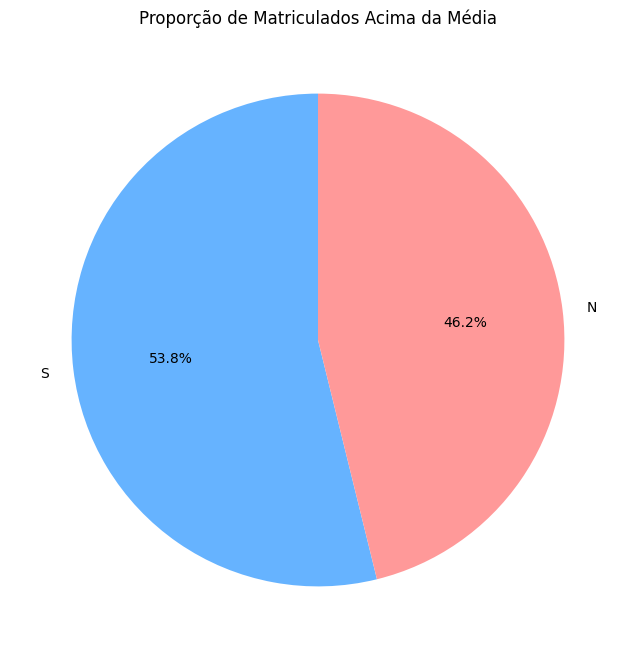

In [101]:
# Contar as ocorrências de "S" e "N" na coluna 'Matriculados_AcimaMedia'
matriculados_counts = dens_por_ano_f['Matriculados_AcimaMedia'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(matriculados_counts, labels=matriculados_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proporção de Matriculados Acima da Média')
plt.show()

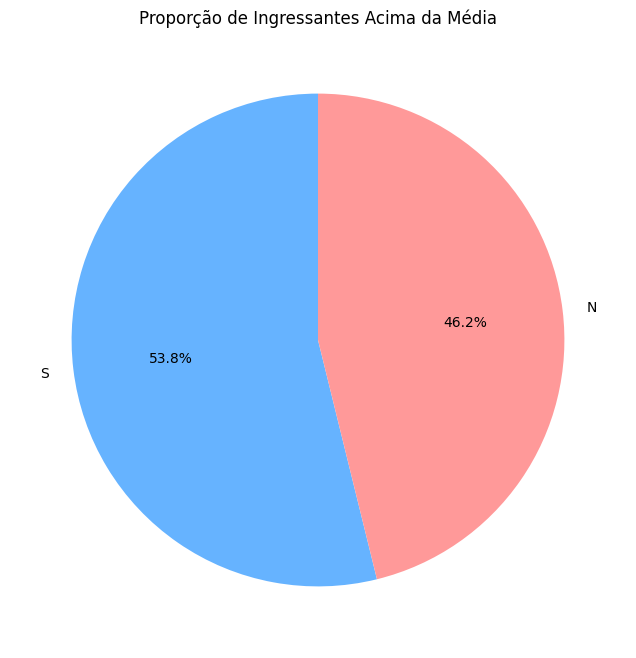

In [102]:
# Contar as ocorrências de "S" e "N" na coluna 'Vinculados_AcimaMedia'
ingressantes_counts = dens_por_ano_f['Ingressantes_AcimaMedia'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(ingressantes_counts, labels=ingressantes_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proporção de Ingressantes Acima da Média')
plt.show()

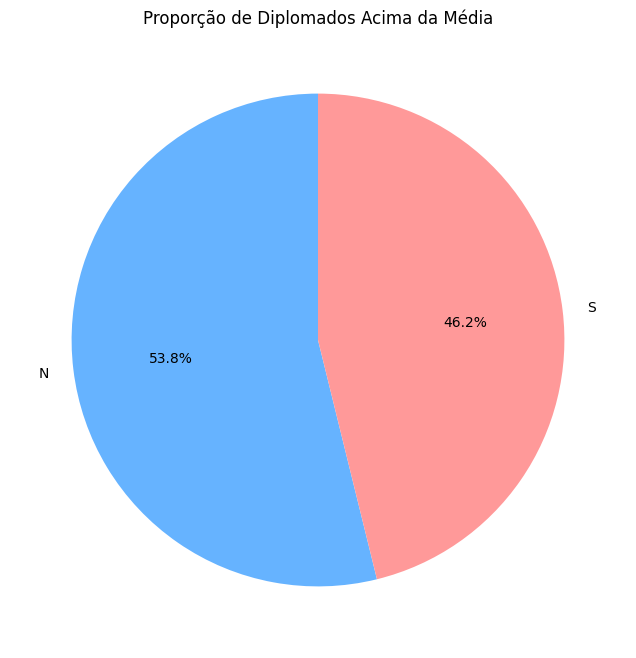

In [103]:
# Contar as ocorrências de "S" e "N" na coluna 'Vinculados_AcimaMedia'
diplomados_counts = dens_por_ano_f['Diplomados_AcimaMedia'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(diplomados_counts, labels=diplomados_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proporção de Diplomados Acima da Média')
plt.show()

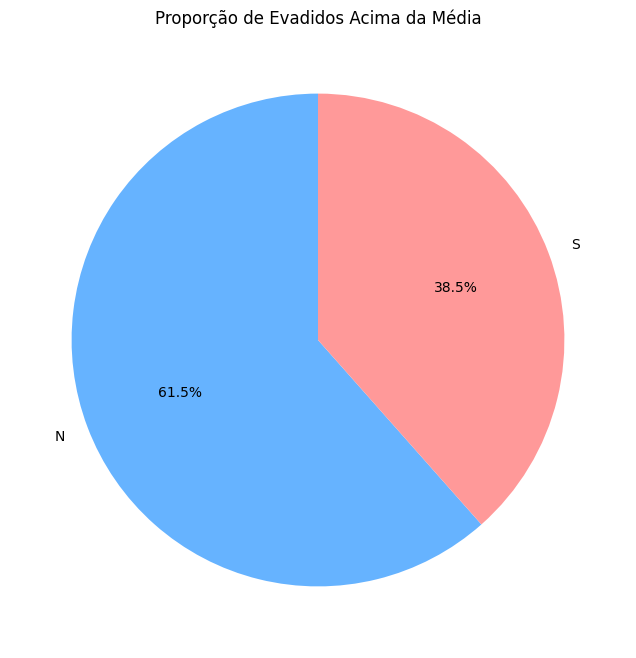

In [104]:
# Contar as ocorrências de "S" e "N" na coluna 'Vinculados_AcimaMedia'
evadidos_counts = dens_por_ano_f['Evadidos_AcimaMedia'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(evadidos_counts, labels=evadidos_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Proporção de Evadidos Acima da Média')
plt.show()

Matriz de correlação do dataframe referente a CIC e ECP UFRGS

                   Ano  Vinculados  Matriculados  Ingressantes  Diplomados  \
Ano           1.000000    0.971131      0.862101      0.288998    0.480802   
Vinculados    0.971131    1.000000      0.857478      0.371068    0.551210   
Matriculados  0.862101    0.857478      1.000000      0.450623    0.393768   
Ingressantes  0.288998    0.371068      0.450623      1.000000   -0.105439   
Diplomados    0.480802    0.551210      0.393768     -0.105439    1.000000   
Evadidos      0.266933    0.341512     -0.105110      0.011892    0.246113   

              Evadidos  
Ano           0.266933  
Vinculados    0.341512  
Matriculados -0.105110  
Ingressantes  0.011892  
Diplomados    0.246113  
Evadidos      1.000000  


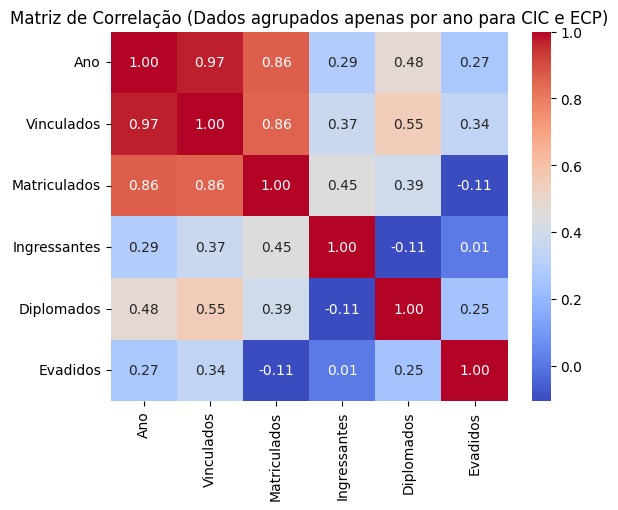

In [105]:
# Suponha que você tenha um DataFrame chamado df com seus dados
# Selecione apenas as colunas numéricas, se necessário
df_numeric = dens_por_ano_f.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = df_numeric.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Plotar mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Dados agrupados apenas por ano para CIC e ECP)')
plt.show()

Calculando correlação entre ingressantes e evadidos - CIC E ECP UFRGS

Correlação entre Ingressantes e Evadidos dps cursos CIC e ECP: 0.011892261161573965


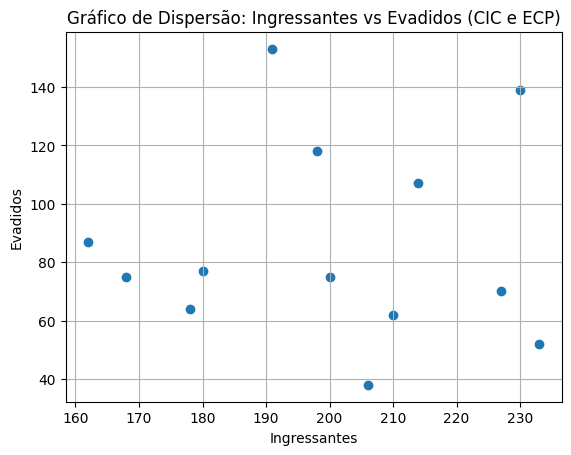

In [106]:
correlacao = dens_por_ano_f['Ingressantes'].corr(dens_por_ano_f['Evadidos'], method='pearson')
print("Correlação entre Ingressantes e Evadidos dps cursos CIC e ECP:", correlacao)
# Extrair as colunas de interesse para o gráfico de dispersão
x = dens_por_ano_f['Ingressantes']
y = dens_por_ano_f['Evadidos']

# Plotar o gráfico de dispersão
plt.scatter(x, y)
plt.xlabel('Ingressantes')
plt.ylabel('Evadidos')
plt.title('Gráfico de Dispersão: Ingressantes vs Evadidos (CIC e ECP)')
plt.grid(True)
plt.show()

In [107]:
# primeiro separamos os dados para o periodo de interesse (2020 e 2022)

df_filtrado_anos = dens_por_ano_f[(dens_por_ano_f['Ano'] >= 2020) & (dens_por_ano_f['Ano'] <= 2022)]
display(df_filtrado_anos)

,Ano,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos,Vinculados_AcimaMedia,Matriculados_AcimaMedia,Ingressantes_AcimaMedia,Diplomados_AcimaMedia,Evadidos_AcimaMedia
10,2020,2300,2171,233,76,52,S,S,S,N,N
11,2021,2465,2409,206,104,38,S,S,S,S,N
12,2022,2559,1918,191,102,153,S,S,N,S,S


In [108]:
from scipy.stats import shapiro

# Dados de exemplo (substitua pelos seus dados)
amostra_ing = df_filtrado_anos['Ingressantes']
amostra_ev = df_filtrado_anos['Evadidos']

# Realizar o teste de normalidade
stat_ing, p_value_ing = shapiro(amostra_ing)
stat_ev, p_value_ev = shapiro(amostra_ev)

# Exibir o resultado
print("Estatística do teste de Shapiro para Ingressantes:", stat_ing)
print("Valor-p:", p_value_ing)
print("")
print("Estatística do teste de Shapiro para Evadidos:", stat_ev)
print("Valor-p:", p_value_ev)



Estatística do teste de Shapiro para Ingressantes: 0.9735100269317627
Valor-p: 0.6877672567333323

Estatística do teste de Shapiro para Evadidos: 0.839789092540741
Valor-p: 0.21351149542543635


In [109]:
from scipy.stats import levene

# Dados de exemplo (substitua pelos seus dados)
grupo1 = df_filtrado_anos['Ingressantes']
grupo2 = df_filtrado_anos['Evadidos']

# Realizar o teste de Levene
stat, p_value = levene(grupo1, grupo2)

# Exibir o resultado
print("Estatística do teste de Levene:", stat)
print("Valor-p:", p_value)


Estatística do teste de Levene: 0.559064204783886
Valor-p: 0.49619884032779255


Neste caso, como o valor-p é maior que um nível de significância comum (como 0.05), não temos evidências suficientes para rejeitar a hipótese nula. Portanto, não podemos concluir que as variâncias das duas amostras são estatisticamente diferentes. Isso sugere que as variâncias podem ser consideradas aproximadamente iguais, o que é uma das suposições do teste t de Student.

Em resumo, com base neste resultado, você pode prosseguir com o teste t de Student com a confiança de que a suposição de homogeneidade das variâncias é razoavelmente atendida.

In [110]:
from scipy.stats import ttest_ind

# Vamos supor que você tenha duas séries de dados: ingressantes e evadidos
ingressantes = df_filtrado['Ingressantes']  # dados de ingressantes
evadidos = df_filtrado['Evadidos']  # dados de evadidos

# Realizar o teste t de Student independente
t_statistic, p_value = ttest_ind(ingressantes, evadidos)

# Exibir os resultados
print("Estatística do teste t:", t_statistic)
print("Valor-p:", p_value)

Estatística do teste t: 7.69273913866411
Valor-p: 9.40163713024816e-12


O p-value obtido no teste t de Student, este valor indica a significância estatística da diferença observada entre as duas amostras testadas. Se o p-value for menor que um nível de significância pré-definido (geralmente 0,05), você rejeitará a hipótese nula e concluirá que há uma diferença significativa entre as médias das duas amostras.

Proporção de ingressantes para evadidos

In [111]:
# Suponha que df_filtrado_anos já esteja definido anteriormente
# Fazer uma cópia do DataFrame para evitar SettingWithCopyWarning

df_copy = dens_por_ano_f.copy()

# Calcular a proporção de Ingressantes para Evadidos
df_copy['Proporcao_Ingressantes_Evadidos'] = df_copy.apply(
    lambda row: row['Ingressantes'] / row['Evadidos'] if row['Evadidos'] != 0 else None,
    axis=1
)

# Exibir o DataFrame atualizado
display(df_copy)

,Ano,Vinculados,Matriculados,Ingressantes,Diplomados,Evadidos,Vinculados_AcimaMedia,Matriculados_AcimaMedia,Ingressantes_AcimaMedia,Diplomados_AcimaMedia,Evadidos_AcimaMedia,Proporcao_Ingressantes_Evadidos
0,2010,1690,1516,168,90,75,N,N,N,S,N,2.240000
1,2011,1736,1583,200,73,75,N,N,S,N,N,2.666667
2,2012,1797,1647,180,86,77,N,N,N,N,N,2.337662
3,2013,1838,1714,178,77,64,N,N,N,N,N,2.781250
4,2014,1995,1823,227,87,70,N,N,S,S,N,3.242857
5,2015,2106,1873,210,85,62,S,N,S,N,N,3.387097
6,2016,2237,1957,230,90,139,S,S,S,S,S,1.654676
7,2017,2226,1984,214,78,107,S,S,S,N,S,2.000000
8,2018,2204,1986,162,86,87,S,S,N,N,S,1.862069
9,2019,2207,1939,198,87,118,S,S,N,S,S,1.677966


A análise de proporção entre ingressantes e evadidos pode fornecer insights valiosos durante a análise exploratória de dados (EDA - Exploratory Data Analysis). Aqui estão alguns pontos importantes que podem ser obtidos com essa análise:

1. Taxa de Retenção e Evasão
Proporção Baixa (Ingressantes/Evadidos Alto): Uma baixa proporção indica que muitos estudantes que ingressam não continuam seus estudos, sugerindo uma alta taxa de evasão. Isso pode sinalizar problemas na retenção de alunos e pode ser um ponto de partida para investigar causas de evasão, como dificuldades acadêmicas, financeiras ou de adaptação.
Proporção Alta (Ingressantes/Evadidos Baixo): Uma alta proporção indica que a maioria dos alunos que ingressam continuam seus estudos, sugerindo uma boa taxa de retenção. Este cenário pode indicar que as estratégias de retenção e suporte aos alunos estão sendo eficazes.
2. Identificação de Padrões Temporais
Por Ano e Período: Ao analisar a proporção ao longo dos anos e períodos, você pode identificar tendências e variações sazonais. Por exemplo, pode haver anos ou períodos específicos onde a evasão é particularmente alta ou baixa.
3. Avaliação de Programas e Intervenções
Impacto de Programas de Suporte: Se a instituição implementou programas de suporte aos alunos em determinados anos, a análise de proporção pode ajudar a avaliar o impacto desses programas. Uma melhora na proporção ingressantes/evadidos após a implementação de tais programas pode indicar sua eficácia.
4. Segmentação e Agrupamento
Por Cursos e Departamentos: A proporção pode ser calculada para diferentes cursos ou departamentos, permitindo identificar quais áreas têm maiores desafios com evasão. Isso pode ajudar a direcionar recursos e estratégias de retenção de maneira mais eficaz.
Perfis de Alunos: Analisar a proporção para diferentes grupos de alunos (por exemplo, por faixa etária, sexo, origem geográfica) pode revelar se certos grupos estão mais propensos à evasão, permitindo a criação de estratégias específicas de suporte.
5. Previsão de Evasão
Modelos Preditivos: A proporção pode ser usada como uma variável em modelos de machine learning para prever a probabilidade de evasão de novos alunos. Isso pode ajudar a instituição a tomar medidas proativas para reduzir a evasão.
6. Análise de Causas
Identificação de Fatores Associados: A análise pode ajudar a identificar fatores associados à alta ou baixa evasão. Por exemplo, uma alta evasão pode estar correlacionada com cursos de maior dificuldade ou menor satisfação dos alunos.

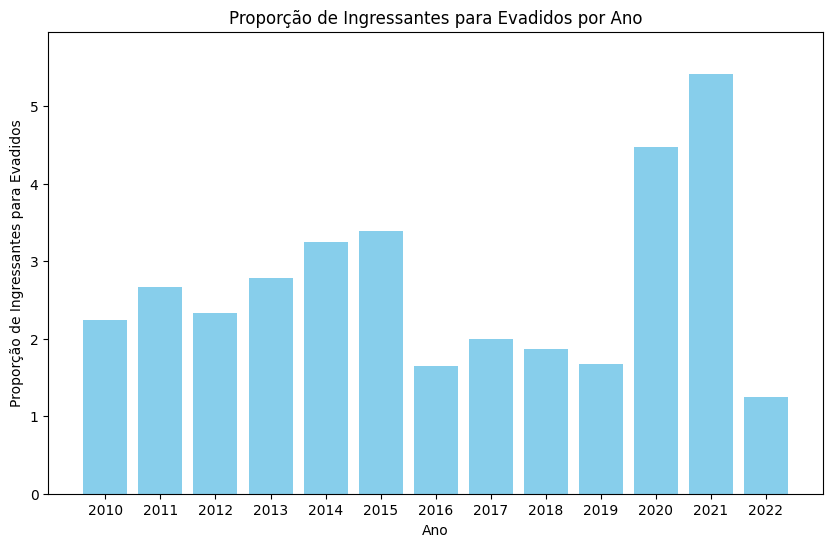

In [112]:
# Criar um gráfico de barras para a coluna 'Ano' e 'Proporcao_Ingressantes_Evadidos'
df_copy = df_copy[df_copy['Ano'] != 2023]
plt.figure(figsize=(10, 6))
plt.bar(df_copy['Ano'], df_copy['Proporcao_Ingressantes_Evadidos'], color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Proporção de Ingressantes para Evadidos')
plt.title('Proporção de Ingressantes para Evadidos por Ano')
plt.xticks(df_copy['Ano'])  # Definir os rótulos do eixo x para serem os anos
plt.ylim(0, max(df_copy['Proporcao_Ingressantes_Evadidos']) * 1.1)  # Ajustar o limite do eixo y

# Exibir o gráfico
plt.show()


Proporção vinculados e matriculados para evadidos

In [113]:
import pandas as pd

# Supondo que você já tenha carregado seu conjunto de dados em um DataFrame 'df'

# Aplicar a operação de divisão e multiplicação para calcular a porcentagem de ingressantes
dens_por_ano['pct_evadidos_vinculados'] = (dens_por_ano['Evadidos'] * 100 / dens_por_ano['Vinculados'])

# Selecionar as colunas desejadas
resultado = dens_por_ano[['Ano', 'pct_evadidos_vinculados']]

# Filtrar os resultados onde a porcentagem de ingressantes é menor que 100
resultado = resultado[resultado['pct_evadidos_vinculados'] < 100]

# Exibir o resultado
print(resultado)


     Ano  pct_evadidos_vinculados
0   2010                 4.181588
1   2011                 4.690142
2   2012                 4.442604
3   2013                 3.957085
4   2014                 4.329559
5   2015                 4.171922
6   2016                 5.293522
7   2017                 5.611309
8   2018                 4.632541
9   2019                 5.507097
10  2020                 2.476448
11  2021                 2.023385
12  2022                 6.652852


Proporção matriculados x evadidos

In [114]:
import pandas as pd

# Supondo que você já tenha carregado seu conjunto de dados em um DataFrame 'df'

# Aplicar a operação de divisão e multiplicação para calcular a porcentagem de ingressantes
dens_por_ano['pct_evadidos_matriculados'] = (dens_por_ano['Evadidos'] * 100 / dens_por_ano['Matriculados'])

# Selecionar as colunas desejadas
resultado = dens_por_ano[['Ano', 'pct_evadidos_matriculados']]

# Filtrar os resultados onde a porcentagem de ingressantes é menor que 100
resultado = resultado[resultado['pct_evadidos_matriculados'] < 100]

# Exibir o resultado
print(resultado)


     Ano  pct_evadidos_matriculados
0   2010                   4.770256
1   2011                   5.308152
2   2012                   5.032832
3   2013                   4.496695
4   2014                   4.952503
5   2015                   4.834201
6   2016                   6.065507
7   2017                   6.391459
8   2018                   5.202372
9   2019                   6.242801
10  2020                   2.621057
11  2021                   2.074244
12  2022                   8.874070


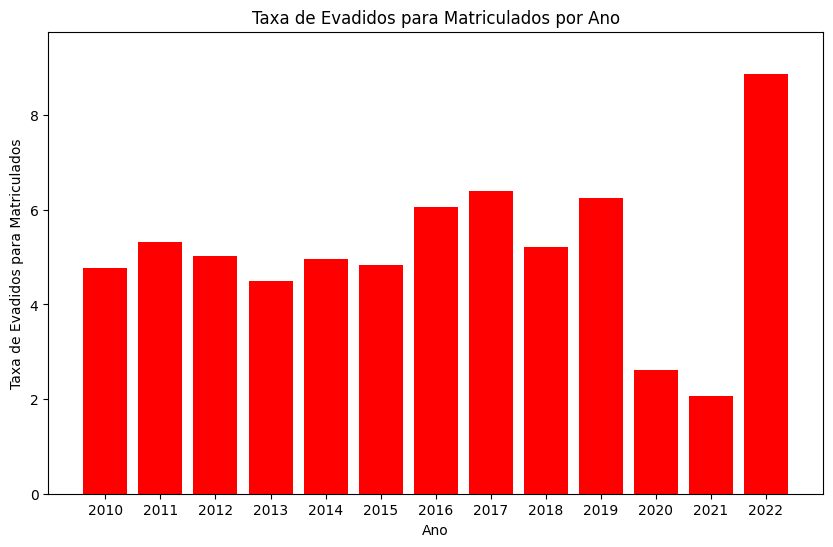

In [115]:
# Criar um gráfico de barras para a coluna 'Ano' e 'Proporcao_Ingressantes_Evadidos'
df_copy = resultado[['Ano','pct_evadidos_matriculados']]
plt.figure(figsize=(10, 6))
plt.bar(df_copy['Ano'], df_copy['pct_evadidos_matriculados'], color='red')
plt.xlabel('Ano')
plt.ylabel('Taxa de Evadidos para Matriculados')
plt.title('Taxa de Evadidos para Matriculados por Ano')
plt.xticks(df_copy['Ano'])  # Definir os rótulos do eixo x para serem os anos
plt.ylim(0, max(df_copy['pct_evadidos_matriculados']) * 1.1)  # Ajustar o limite do eixo y

# Exibir o gráfico
plt.show()

Proporção ingressantes x vinculados

In [116]:
import pandas as pd

# Supondo que você já tenha carregado seu conjunto de dados em um DataFrame 'df'

# Aplicar a operação de divisão e multiplicação para calcular a porcentagem de ingressantes
dens_por_ano['pct_ingressantes_vinculados'] = (dens_por_ano['Ingressantes'] * 100 / dens_por_ano['Vinculados'])

# Selecionar as colunas desejadas
resultado = dens_por_ano[['Ano', 'pct_ingressantes_vinculados']]

# Filtrar os resultados onde a porcentagem de ingressantes é menor que 100
resultado = resultado[resultado['pct_ingressantes_vinculados'] < 100]

# Exibir o resultado
print(resultado)


     Ano  pct_ingressantes_vinculados
0   2010                     9.211431
1   2011                    10.563846
2   2012                    11.093910
3   2013                    11.279086
4   2014                    11.628098
5   2015                    10.735684
6   2016                    10.264830
7   2017                     9.642510
8   2018                    11.040037
9   2019                     9.665166
10  2020                    10.516743
11  2021                     8.950608
12  2022                     7.102075


Proporção Ingressantes x Matriculados

In [117]:
import pandas as pd

# Supondo que você já tenha carregado seu conjunto de dados em um DataFrame 'df'

# Aplicar a operação de divisão e multiplicação para calcular a porcentagem de ingressantes
dens_por_ano['pct_ingressantes_matriculados'] = (dens_por_ano['Ingressantes'] * 100 / dens_por_ano['Matriculados'])

# Selecionar as colunas desejadas
resultado = dens_por_ano[['Ano', 'pct_ingressantes_matriculados']]

# Filtrar os resultados onde a porcentagem de ingressantes é menor que 100
resultado = resultado[resultado['pct_ingressantes_matriculados'] < 100]

# Exibir o resultado
print(resultado)

     Ano  pct_ingressantes_matriculados
0   2010                      10.508181
1   2011                      11.955821
2   2012                      12.567805
3   2013                      12.817163
4   2014                      13.301168
5   2015                      12.439938
6   2016                      11.761810
7   2017                      10.983126
8   2018                      12.398031
9   2019                      10.956355
10  2020                      11.130855
11  2021                       9.175586
12  2022                       9.473277


Proporção evadidos x vinculados

In [120]:
import pandas as pd

# Supondo que você já tenha carregado seu conjunto de dados em um DataFrame 'df'

# Aplicar a operação de divisão e multiplicação para calcular a porcentagem de ingressantes
dens_por_ano['pct_evadidos_vinculados'] = (dens_por_ano['Evadidos'] * 100 / dens_por_ano['Vinculados'])

# Selecionar as colunas desejadas
resultado = dens_por_ano[['Ano', 'pct_evadidos_vinculados']]

# Filtrar os resultados onde a porcentagem de ingressantes é menor que 100
resultado = resultado[resultado['pct_evadidos_vinculados'] < 100]

# Exibir o resultado
print(resultado)

     Ano  pct_evadidos_vinculados
0   2010                 4.181588
1   2011                 4.690142
2   2012                 4.442604
3   2013                 3.957085
4   2014                 4.329559
5   2015                 4.171922
6   2016                 5.293522
7   2017                 5.611309
8   2018                 4.632541
9   2019                 5.507097
10  2020                 2.476448
11  2021                 2.023385
12  2022                 6.652852


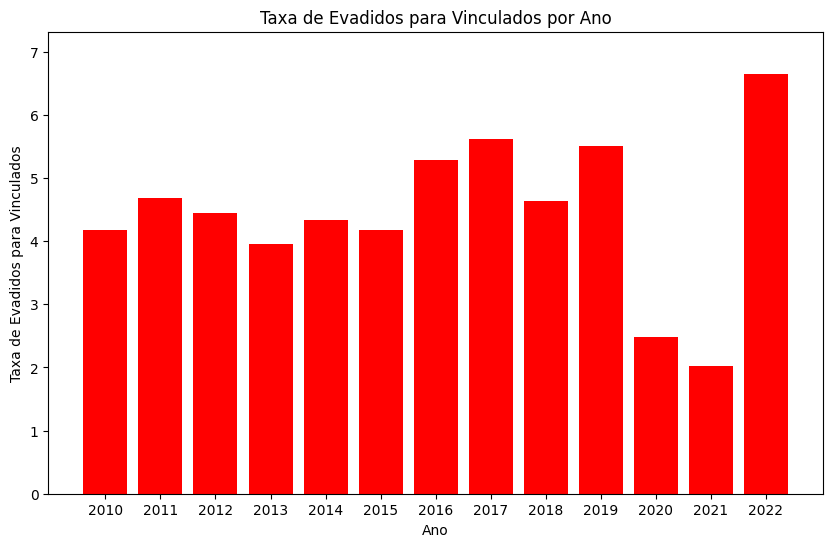

In [121]:
# Criar um gráfico de barras para a coluna 'Ano' e 'Proporcao_Ingressantes_Evadidos'
df_copy = resultado[['Ano','pct_evadidos_vinculados']]
plt.figure(figsize=(10, 6))
plt.bar(df_copy['Ano'], df_copy['pct_evadidos_vinculados'], color='red')
plt.xlabel('Ano')
plt.ylabel('Taxa de Evadidos para Vinculados')
plt.title('Taxa de Evadidos para Vinculados por Ano')
plt.xticks(df_copy['Ano'])  # Definir os rótulos do eixo x para serem os anos
plt.ylim(0, max(df_copy['pct_evadidos_vinculados']) * 1.1)  # Ajustar o limite do eixo y

# Exibir o gráfico
plt.show()

A taxa de alunos evadidos por vinculados em % representa a proporção de alunos que abandonaram o curso em relação ao número total de alunos vinculados ao curso, expressa como uma porcentagem.

Por exemplo, se a taxa de evasão for de 10%, isso significa que 10% dos alunos que estavam matriculados no curso abandonaram antes de completar o curso. Em outras palavras, a cada 100 alunos matriculados, 10 abandonaram.

A interpretação dessa taxa pode fornecer insights sobre a eficácia do programa educacional, a qualidade do ensino, as condições do ambiente acadêmico e outros fatores que podem influenciar a decisão dos alunos de permanecer ou abandonar o curso.

Uma taxa de evasão alta pode indicar problemas dentro do programa educacional, como falta de suporte acadêmico ou social, dificuldades financeiras dos alunos, problemas de adaptação ou insatisfação com o currículo. Por outro lado, uma taxa de evasão baixa pode sugerir um programa bem-sucedido com boa retenção de alunos.

Portanto, ao interpretar a taxa de alunos evadidos por vinculados em %, é importante considerar o contexto específico da instituição de ensino e investigar quaisquer fatores que possam estar contribuindo para a evasão, a fim de implementar medidas eficazes para melhorar a retenção de alunos.

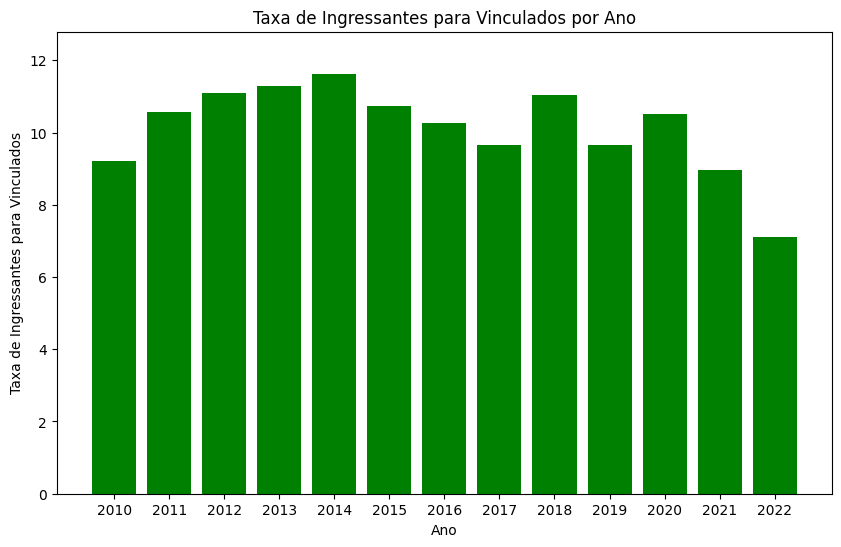

In [ ]:
# Criar um gráfico de barras para a coluna 'Ano' e 'Proporcao_Ingressantes_Evadidos'
df_copy = resultado[['Ano','pct_ingressantes_vinculados']]
plt.figure(figsize=(10, 6))
plt.bar(df_copy['Ano'], df_copy['pct_ingressantes_vinculados'], color='green')
plt.xlabel('Ano')
plt.ylabel('Taxa de Ingressantes para Vinculados')
plt.title('Taxa de Ingressantes para Vinculados por Ano')
plt.xticks(df_copy['Ano'])  # Definir os rótulos do eixo x para serem os anos
plt.ylim(0, max(df_copy['pct_ingressantes_vinculados']) * 1.1)  # Ajustar o limite do eixo y

# Exibir o gráfico
plt.show()

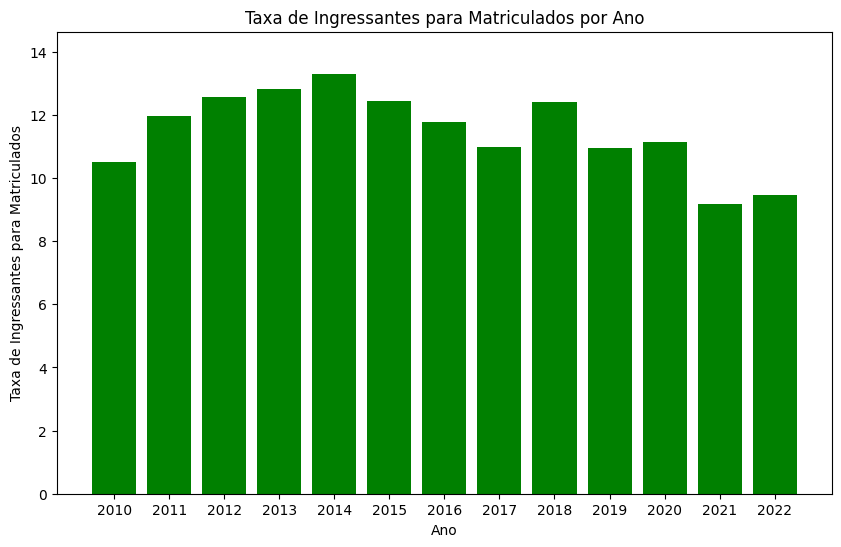

In [ ]:
# Criar um gráfico de barras para a coluna 'Ano' e 'Proporcao_Ingressantes_Evadidos'
df_copy = resultado[['Ano','pct_ingressantes_matriculados']]
plt.figure(figsize=(10, 6))
plt.bar(df_copy['Ano'], df_copy['pct_ingressantes_matriculados'], color='green')
plt.xlabel('Ano')
plt.ylabel('Taxa de Ingressantes para Matriculados')
plt.title('Taxa de Ingressantes para Matriculados por Ano')
plt.xticks(df_copy['Ano'])  # Definir os rótulos do eixo x para serem os anos
plt.ylim(0, max(df_copy['pct_ingressantes_matriculados']) * 1.1)  # Ajustar o limite do eixo y

# Exibir o gráfico
plt.show()